In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline
from game2 import game, random_connection_game, random_connection_game_initialstate

In [2]:
import time
from IPython.display import clear_output

In [3]:
Memb = 400
newg = random_connection_game(9,  Memb)

In [4]:
def randomAgent(state):
    spin_2 = random.randint(6)
    return spin_2

In [5]:
from model.dqn_agent import Agent

In [6]:
from model.model import QNetwork_Conv

In [7]:
# Reset!
Memb = 6*6
statesize = Memb*Memb*1+9*9
actionsize = 4+2
randomAgent0 = lambda state: randomAgent(state)
#env = game(Hint, Memb = Memb)
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [64, 64, 256, 128, 128, 128], model = QNetwork_Conv)

#                   nu = [32, 64, 64, 64, 64], model = QNetwork_Conv)


In [8]:
env = random_connection_game_initialstate(6,  Memb)


In [9]:
env.score

0

In [10]:
#env = random_connection_game(5,  Memb)


In [11]:
state = env.reset()
smartagent0.act(state, eps = 1.0)

/home/pablo/github/mios/game_embeddings/model/model.py:135: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.Softmax(x)


0

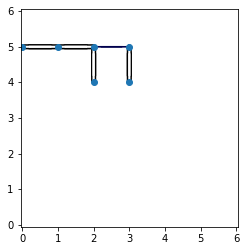

0.4944444444444447 6 1 0


In [18]:

Memb = 6*6
statesize = Memb*Memb*1+9*9
actionsize = 4+2
env = random_connection_game_initialstate(2,  Memb, p=0.0,
                             max_consecutive_failures = 50)
state = env.reset()
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [16, 16, 16, 16, 32], model = QNetwork_Conv)

fig, ax = env.plot()
score = 0.0


actions = []
for j in range(100):
    clear_output(wait=True)
    #randomAgent(state, Memb)#
    action = smartagent0.act(state, eps = 0.0)
    #print(action)
    state, reward, done =env.step(action)
    score += reward
    actions.append((action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

In [19]:

env = random_connection_game_initialstate(2,  Memb, p =0.0,
                             max_consecutive_failures = 50)

In [24]:
from collections import namedtuple, deque

def dqn(agent, n_episodes=2000, max_t=2000, 
        eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0

        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score, eps: {:.2f}, {:.2f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=0.9999:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_online.state_dict(), 'checkpoint.pth')
            break
    return scores

In [25]:
from model.dqn_agent import AgentRainbow

In [26]:

Memb = 4*4
statesize = Memb*Memb*2+9*9
env = random_connection_game_initialstate(2,  Memb, p =0.0,
                             max_consecutive_failures = 50)

In [27]:
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [16, 16, 16, 16, 32], model = QNetwork_Conv)
scores = dqn(smartagent0, n_episodes=10000, eps_decay = 0.9995)

Episode 100	Average Score, eps: 0.39, 0.95
Episode 200	Average Score, eps: 0.56, 0.90
Episode 300	Average Score, eps: 0.48, 0.86
Episode 400	Average Score, eps: 0.42, 0.82
Episode 500	Average Score, eps: 0.39, 0.78
Episode 600	Average Score, eps: 0.44, 0.74
Episode 700	Average Score, eps: 0.35, 0.70
Episode 800	Average Score, eps: 0.43, 0.67
Episode 900	Average Score, eps: 0.57, 0.64
Episode 1000	Average Score, eps: 0.51, 0.61
Episode 1100	Average Score, eps: 0.41, 0.58
Episode 1200	Average Score, eps: 0.55, 0.55
Episode 1300	Average Score, eps: 0.57, 0.52
Episode 1400	Average Score, eps: 0.52, 0.50
Episode 1500	Average Score, eps: 0.52, 0.47
Episode 1600	Average Score, eps: 0.54, 0.45
Episode 1700	Average Score, eps: 0.63, 0.43
Episode 1800	Average Score, eps: 0.46, 0.41
Episode 1900	Average Score, eps: 0.59, 0.39
Episode 2000	Average Score, eps: 0.55, 0.37
Episode 2100	Average Score, eps: 0.56, 0.35
Episode 2200	Average Score, eps: 0.60, 0.33
Episode 2300	Average Score, eps: 0.48, 0.

In [28]:
#smartagent0b = AgentRainbow(2*36*36, actionsize, seed = 1,
#                    embedding_size = Memb, neighbours = 4,
#                   nu = [128, 32, 16])
#scores = dqn(smartagent0b, n_episodes=10000, eps_decay = 0.9995)

In [29]:
#plt.plot(scores)
#plt.xlim(9500,10000)

In [31]:
import torch

In [32]:
torch.save(smartagent0.qnetwork_online.state_dict(), 'checkpoint.pth')

In [35]:
scores = []
for i in range(10000):
    
    state = env.reset()
    #fig, ax = env.plot()
    score = 0.0
    actions = []
    for j in range(1000):
        #randomAgent(state, Memb)#
        action = smartagent0.act(state)
        state, reward, done =env.step(action)
        score += reward
        actions.append((action, reward, env.N, env.terms_left ))

        #fig, ax = env.plot()
        #plt.show()
        if done >0:
            #print('FINISHED')
            break
    
    scores.append(score)
    clear_output(wait=True)
        
    print('score: {:.4f}'.format(np.mean(scores)))

score: 0.6807


In [38]:
smartagent1 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [32,64,32,64,128,128], nconv = 3,  model = QNetwork_Conv)

scores = dqn(smartagent1, n_episodes=20000, eps_decay = 0.9997)

Episode 100	Average Score, eps: 0.30, 0.97
Episode 200	Average Score, eps: 0.51, 0.94
Episode 300	Average Score, eps: 0.48, 0.91
Episode 400	Average Score, eps: 0.37, 0.89
Episode 500	Average Score, eps: 0.47, 0.86
Episode 600	Average Score, eps: 0.51, 0.84
Episode 700	Average Score, eps: 0.37, 0.81
Episode 800	Average Score, eps: 0.35, 0.79
Episode 900	Average Score, eps: 0.47, 0.76
Episode 1000	Average Score, eps: 0.37, 0.74
Episode 1100	Average Score, eps: 0.51, 0.72
Episode 1200	Average Score, eps: 0.30, 0.70
Episode 1300	Average Score, eps: 0.46, 0.68
Episode 1400	Average Score, eps: 0.44, 0.66
Episode 1500	Average Score, eps: 0.35, 0.64
Episode 1600	Average Score, eps: 0.49, 0.62
Episode 1700	Average Score, eps: 0.43, 0.60
Episode 1800	Average Score, eps: 0.54, 0.58
Episode 1900	Average Score, eps: 0.32, 0.57
Episode 2000	Average Score, eps: 0.51, 0.55
Episode 2100	Average Score, eps: 0.59, 0.53
Episode 2200	Average Score, eps: 0.52, 0.52
Episode 2300	Average Score, eps: 0.54, 0.

Episode 18500	Average Score, eps: 0.73, 0.01
Episode 18600	Average Score, eps: 0.62, 0.01
Episode 18700	Average Score, eps: 0.67, 0.01
Episode 18800	Average Score, eps: 0.64, 0.01
Episode 18900	Average Score, eps: 0.66, 0.01
Episode 19000	Average Score, eps: 0.72, 0.01
Episode 19100	Average Score, eps: 0.70, 0.01
Episode 19200	Average Score, eps: 0.69, 0.01
Episode 19300	Average Score, eps: 0.74, 0.01
Episode 19400	Average Score, eps: 0.67, 0.01
Episode 19500	Average Score, eps: 0.67, 0.01
Episode 19600	Average Score, eps: 0.60, 0.01
Episode 19700	Average Score, eps: 0.67, 0.01
Episode 19800	Average Score, eps: 0.73, 0.01
Episode 19900	Average Score, eps: 0.72, 0.01
Episode 20000	Average Score, eps: 0.65, 0.01


In [48]:
def test_agent(agent,  npt = 1000, verbose = True):
    scores = []
    for i in range(npt):

        state = env.reset()
        #fig, ax = env.plot()
        score = 0.0
        actions = []
        for j in range(1000):
            action = agent.act(state)
            state, reward, done =env.step(action)
            score += reward
            actions.append((action, reward, env.N, env.terms_left ))

            #fig, ax = env.plot()
            #plt.show()
            if done >0:
                #print('FINISHED')
                break

        scores.append(score)
        if verbose:
            clear_output(wait=True)
            print('score: {:.4f}'.format(np.mean(scores)))
    return np.array(scores)

def watch_game(agent, npmax = 1000):
    state = env.reset()
    fig, ax = env.plot()
    score = 0.0
    actions = []
    for j in range(npmax):
        clear_output(wait=True)
        action = agent.act(state, eps = 0.0)
        #print(action)
        state, reward, done =env.step(action)
        score += reward
        actions.append((action, reward))

        fig, ax = env.plot()
        plt.show()
        
        if done >0:
            break
            print('Finished!')

In [44]:
score0 = test_agent(smartagent0)

score: 0.6874


In [45]:
score1 = test_agent(smartagent1)

score: 0.6802


Text(0.5, 0, 'scores')

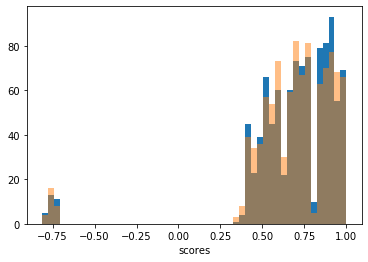

In [47]:
plt.hist(score0, 51)
plt.hist(score1, 51, alpha = 0.5)
plt.xlabel('scores')

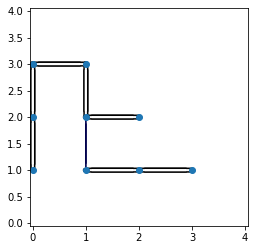

In [81]:
watch_game(smartagent0)

In [82]:

env = random_connection_game_initialstate(3,  Memb, p =0.0,
                             max_consecutive_failures = 50)

In [84]:
score0_3 = test_agent(smartagent0)

score: 0.2924


In [86]:
score0_3 = test_agent(smartagent0)

score: 0.1093


In [ ]:
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [16, 16, 16, 16, 32], model = QNetwork_Conv)

scores_3 = dqn(smartagent0, n_episodes=20000, eps_decay = 0.9995)

Episode 100	Average Score, eps: -0.14, 0.95
Episode 200	Average Score, eps: -0.22, 0.90
Episode 300	Average Score, eps: -0.29, 0.86
Episode 400	Average Score, eps: -0.23, 0.82
Episode 500	Average Score, eps: -0.09, 0.78
Episode 600	Average Score, eps: -0.19, 0.74
Episode 700	Average Score, eps: -0.16, 0.70
Episode 800	Average Score, eps: -0.19, 0.67
Episode 900	Average Score, eps: -0.15, 0.64
Episode 1000	Average Score, eps: -0.13, 0.61
Episode 1100	Average Score, eps: -0.13, 0.58
Episode 1200	Average Score, eps: -0.17, 0.55
Episode 1300	Average Score, eps: 0.05, 0.52
Episode 1400	Average Score, eps: -0.03, 0.50
Episode 1500	Average Score, eps: -0.09, 0.47
Episode 1600	Average Score, eps: -0.13, 0.45
Episode 1700	Average Score, eps: -0.15, 0.43
Episode 1800	Average Score, eps: -0.23, 0.41
Episode 1900	Average Score, eps: -0.08, 0.39
Episode 2000	Average Score, eps: -0.31, 0.37
Episode 2100	Average Score, eps: -0.15, 0.35
Episode 2200	Average Score, eps: -0.22, 0.33
Episode 2300	Average

In [35]:
import torch
def get_probs(state):
    state = torch.from_numpy(state).float().unsqueeze(0).to(device)
    smartagent0.qnetwork_online.eval()
    with torch.no_grad():
        action_values = smartagent0.qnetwork_online(state)
    smartagent0.qnetwork_online.train()

    return np.squeeze(action_values.cpu().data.numpy())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/home/pablo/github/mios/game_embeddings/model/model.py:129: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.Softmax(x)


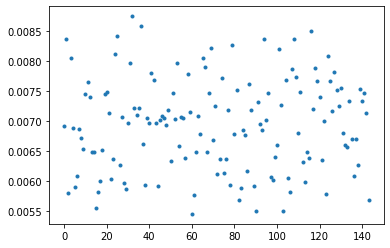

In [38]:
plt.plot(get_probs(state),'.')

In [100]:
Memb*4

144

In [29]:
def step_ext(self, move):
    self.reward = 0.0

    if self.N0<self.nS:
        self.add_new_spin(move[0])
    else:    
        spinpos_1 = self.posS[move[0]%self.N] 
        j = self.get_neighbours(spinpos_1, move[1])
        js = np.array([self.get_neighbours(spinpos_1, (move[1]+k)%4) 
                      for k in range(4)])

        sel = (js > -1)
        if sel.sum()>0:
            js = js[sel]
            idcs = np.arange(js.shape[0])
            i = spinpos_1
            print(i, js,':', i%self.Lx, i//self.Lx)
            for idx in idcs:
                j = js[idx]
                i0 = self.uniqS[i] 
                j0 = self.uniqS[j]
                print(i0, j0, j)
                if i0 != j0 and j0 == -1:
                    self.copy_spin(i,j)
                    print('Copied?')
                    break
                else:
                    jint0 = self.Hmask[i0,j0]
                    if jint0>0.0:
                        self.add_interaction(i,j)

                        print('Added?')
                        break
                    else:
                        pass

        else:
            self.number_nomoves += 1

            self.update_score(-1)

    self.state = self.get_state()

    if (self.Hmask>0).sum()==0:
        self.reward += self.nS
        self.score += self.reward
        self.finished = 1 # Won
    elif self.N == self.Memb:
        self.reward -= self.nS
        self.score += self.reward
        self.finished = 1 # Lost
    if self.number_nomoves > self.max_confailures:
        self.reward -= self.nS
        self.score += self.reward
        self.finished = 1

    return self.state, self.reward, self.finished
env.step = step_ext

1 1 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
3 0 3
1 (3, 3) 3


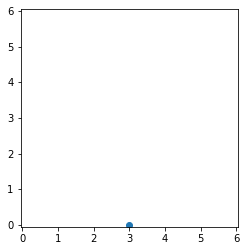

In [40]:
print(env.N, env.N0, env.posS)
action = (3,3)
state, reward, done =env.step(env,action)
env.plot()
print(action[0]%6, action[0]//6, action[1])
print(env.N, action, env.terms_left)


In [29]:
env.uniqS[2+6+6]

3

In [31]:
env.Hmask[:env.nS,:env.nS]

array([[0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 1.],
       [0., 1., 1., 0.]])

In [ ]:
np.random.choice?

In [ ]:
plt.plot(np.array(actions)[:,0],'.')

In [23]:
for param0,param1 in zip(smartagent0.qnetwork_online.parameters(),smartagent0.qnetwork_target.parameters()):
    print(param0.data.cpu().numpy()-param1.data.cpu().numpy())

[[[[ 5.15431166e-04]
   [-1.51129067e-03]
   [ 3.23827565e-03]
   [-3.43459845e-03]
   [ 1.03056431e-04]]

  [[-2.98134983e-03]
   [ 5.93878329e-04]
   [-2.59785354e-03]
   [-3.25068645e-03]
   [ 0.00000000e+00]]]


 [[[ 1.37270242e-03]
   [ 1.05532836e-02]
   [-8.64267349e-07]
   [-7.91326165e-03]
   [ 3.85440327e-03]]

  [[ 5.39750978e-03]
   [ 1.49501860e-02]
   [ 2.76767127e-02]
   [-1.83558464e-03]
   [ 5.95982075e-02]]]


 [[[-2.04023719e-03]
   [ 1.13965720e-02]
   [-1.36762857e-03]
   [ 2.61681527e-03]
   [-5.09971380e-03]]

  [[-1.29418820e-02]
   [ 5.71699440e-03]
   [-2.22345814e-02]
   [ 0.00000000e+00]
   [-2.12760717e-02]]]


 [[[-2.97017395e-04]
   [-2.70548463e-03]
   [-2.17178464e-03]
   [ 3.39701772e-03]
   [ 8.22371244e-03]]

  [[-2.94240266e-02]
   [ 7.20417500e-03]
   [-2.61764899e-02]
   [-2.52903402e-02]
   [ 0.00000000e+00]]]


 [[[-2.26119161e-03]
   [ 6.78441674e-03]
   [-3.72350216e-03]
   [-1.65772869e-03]
   [ 3.27606499e-03]]

  [[ 5.50557673e-03]
   [ 0.0